-----------------------------------
#### **Programacion Entera con Python: Caso set covering**
**Universidad Tecnologica Nacional - Facultad Buenos Aires** <br>
**Ingenieria Industrial**<br>
**Investigacion Operativa** <br>
Autor: Martin Palazzo <br>
Curso I4051 <br>



```
# Tiene formato de código
```



In [1]:
pip install pulp

     |████████████████████████████████| 41.2 MB 78 kB/s 


En un parque nacional existen 7 bases con equipamiento para los guarda bosques. La tabla 1 muestra la distancia en minutos que existe entre cada base del parque nacional. El objetivo es equipar las bases con equipos de drones para poder monitorear posibles focos de incendio. Se quiere adquirir una cantidad minima de equipos que asegure que cada base estará cubierta con un drone hasta 15 minutos de vuelo. 


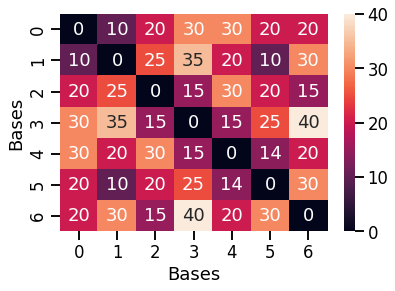

In [30]:
dist = np.array([[ 0, 10, 20, 30, 30, 20, 20],
       [10,  0, 25, 35, 20, 10, 30],
       [20, 25,  0, 15, 30, 20, 15],
       [30, 35, 15,  0, 15, 25, 40],
       [30, 20, 30, 15,  0, 14, 20],
       [20, 10, 20, 25, 14,  0, 30],
       [20, 30, 15, 40, 20, 30,  0]])


sns.heatmap(dist, cbar = 'viridis', annot=True)
plt.xlabel('Bases')
plt.ylabel('Bases')
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pulp
from pulp import *
import scipy as sp
from scipy import optimize

Las variables de decision 
$$
x = [x_1, x_2, x_3, x_4, x_5, x_6, x_7]
$$

donde $$x \in \{ 0,1\}$$

La funcion objetivo del problema Primal Programacion Lineal

$$\text{min } x_1 + x_2 + x_3 + x_4 + x_5 + x_6 
$$

sujeto a las restricciones

\begin{matrix}
x_1 + x_2 & \geq 1 \\ 
x_1 + x_2 + x_6  & \geq 1 \\ 
x_3 + x_4 + x_7 & \geq 1 \\ 
x_3 + x_4 + x_5 & \geq 1 \\ 
x_4 + x_5 + x_6 & \geq 1 \\
x_2 + x_5 + x_6 & \geq 1 \\
x_3 + x_7 & \geq 1
\end{matrix}





In [8]:
import pulp
# definimos si es un problema de minimizacion o maximizacion
set_covering = LpProblem("Primal", LpMinimize)

# definimos las variables de decision, el tipo de variable y la cota inferior
x1 = LpVariable('x1', lowBound=0, cat='Integer')
x2 = LpVariable('x2', lowBound=0, cat='Integer')
x3 = LpVariable('x3', lowBound=0, cat='Integer')
x4 = LpVariable('x4', lowBound=0, cat='Integer')
x5 = LpVariable('x5', lowBound=0, cat='Integer')
x6 = LpVariable('x6', lowBound=0, cat='Integer')
x7 = LpVariable('x7', lowBound=0, cat='Integer')


In [9]:
# primero agregamos la funcion objetivo
set_covering += x1 + x2 + x3 + x4 + x5 + x6 + x7 , "Funcion objetivo"

# luego agregamos restricciones
set_covering += x1 + x2 >= 1 , "Nodo 1"
set_covering += x1 + x2 + x6 >= 1, "Nodo 2"
set_covering += x3 + x4 + x7 >= 1, "Nodo 3"
set_covering += x3 + x4 + x5 >= 1, "Nodo 4"
set_covering += x4 + x5 + x6 >= 1, "Nodo 5"
set_covering += x2 + x5 + x6 >= 1, "Nodo 6"
set_covering += x3 + x7 >= 1, "Nodo 7"

In [10]:
# Resolver el problema con el solver de PULP
set_covering.solve()

1

In [11]:
# valor de la funcion objetivo
value(set_covering.objective)

3.0

In [13]:
# obtenemos el valor de la variable de decision X1....X12 en el punto optimo
variables_decision = np.array([[set_covering.variables()[0].varValue,
  set_covering.variables()[1].varValue,
  set_covering.variables()[2].varValue,
  set_covering.variables()[3].varValue,
  set_covering.variables()[4].varValue,
  set_covering.variables()[5].varValue,
  set_covering.variables()[6].varValue
  ]])

In [14]:
print(variables_decision)

[[1. 0. 0. 0. 1. 0. 1.]]
